
# Logistic Regression

For this Notebook we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). 

This is a very famous data set and very often is a student's first step in machine learning and classification ! 

We'll be trying to predict a classification: Did the passenger survived or deceased (binary outcome).

## Import Libraries
Let's import some libraries to get started!

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# Data Dictionary

**survival**: 0 = No, 1 = Yes.

**pclass**:	Ticket class: 1 = 1st (Upper), 2 = 2nd (Middle), 3 = 3rd (Lower).

**sex**: Sex.

**Age**: Age in years (Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5).

**sibsp**: # of siblings / spouses aboard the Titanic.

**parch**: # of parents / children aboard the Titanic (Some children travelled only with a nanny, therefore parch=0 for them).

**ticket**: Ticket number.

**fare**: Passenger fare.

**cabin**: Cabin number.

**embarked** Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton.

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data


In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# retreive sum of missing rows in form of %
100* train.isnull().sum() / len(train)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
# turn this into a function
def percent_missing(df):
    # return number of missing values per column.
    percent_nan = 100* df.isnull().sum() / len(df)
    # keep columns with positive number of missing values.
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [9]:
percent_nan = percent_missing(train)

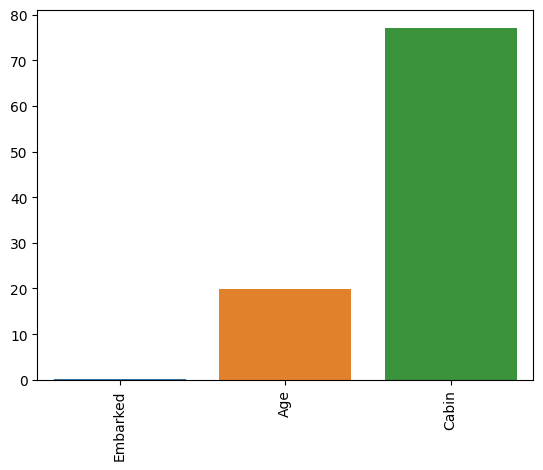

In [10]:
# Lets plot the data, use index as x-axis, and percentage of missing value for the y-axis.
# rotate to 90° the x-axis values (column names) for better visibility.
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. 

Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0".

<AxesSubplot:xlabel='Survived', ylabel='count'>

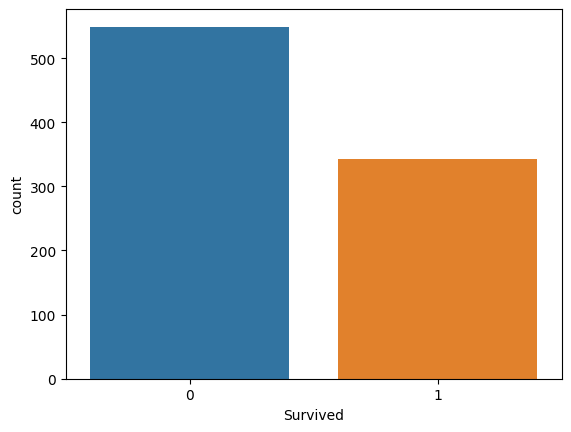

In [11]:
# Visualize the survival class (ratio of target labels)
sns.countplot(x='Survived',data=train)
# We have more people that didnt survive (550 vs 340).

<AxesSubplot:xlabel='Survived', ylabel='count'>

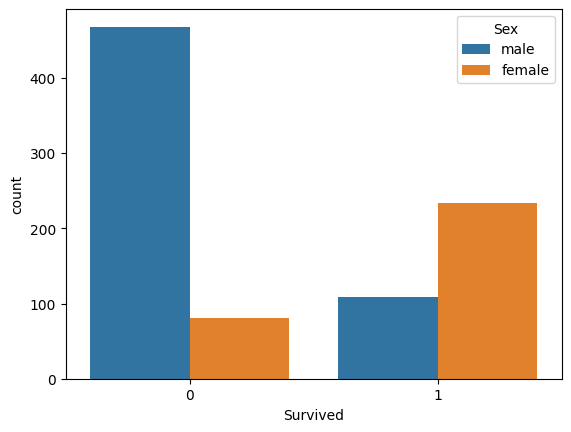

In [12]:
# Add hue = 'sex' to undrestand the trend. 
sns.countplot(x='Survived',hue='Sex',data=train)

This looks like the people who didn't survice were much more likely to be male.
People that did survice, are likely to be female.

<AxesSubplot:xlabel='Survived', ylabel='count'>

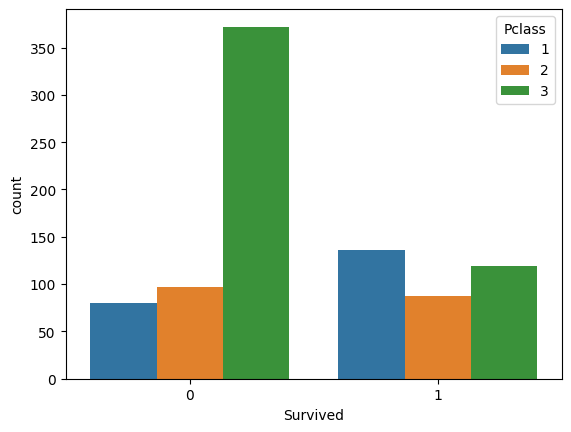

In [13]:
# Add hue = 'Pclass' to undrestand the trend. 
sns.countplot(x='Survived',hue='Pclass',data=train)

We can tell that people who didnt survive, were mostly part of the third class (3-cheapest).
More or less, the people that did survive were towards the higher classes (1+2).

<AxesSubplot:xlabel='Age', ylabel='Count'>

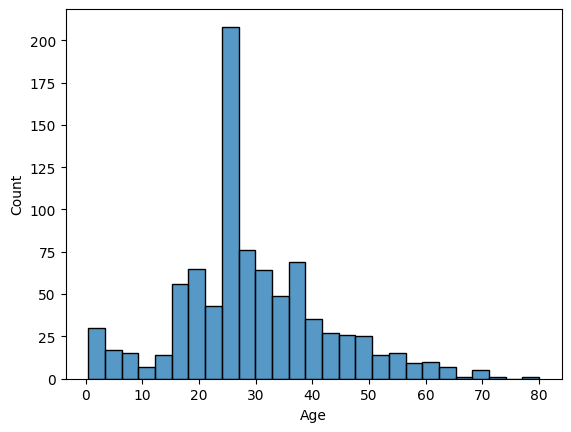

In [72]:
# Undrestand the age of people on the Titanic.
sns.histplot(x ='Age', data = train)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

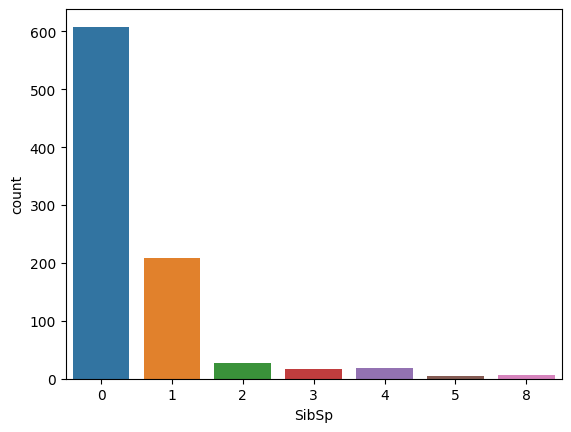

In [15]:
# Visualise Number of Siblings or spouses.
sns.countplot(x='SibSp',data=train)

Most people on board did not have neither children or spouse.
Mostly are single people followed by couples.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

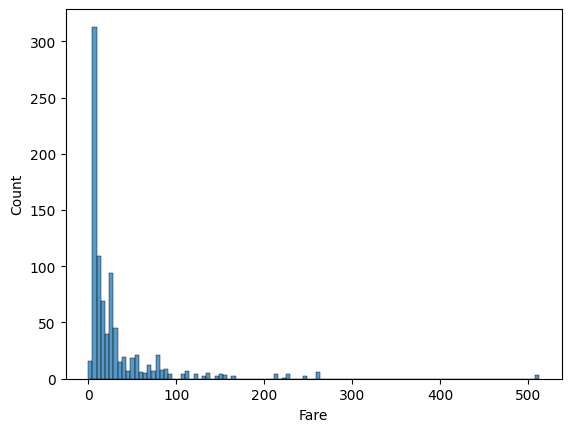

In [16]:
# How much people paid ?
sns.histplot(x='Fare',data=train) # Try with bins=10

Most people have pair a price between 0-50$ which logical since most passengers are in the cheaper 3rd Class. (These prices are from 1912).

___
## Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. 

One way to do this is by filling in the mean age of all the passengers (imputation).

However we can be smarter about this and check the average age by passenger class. For example:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

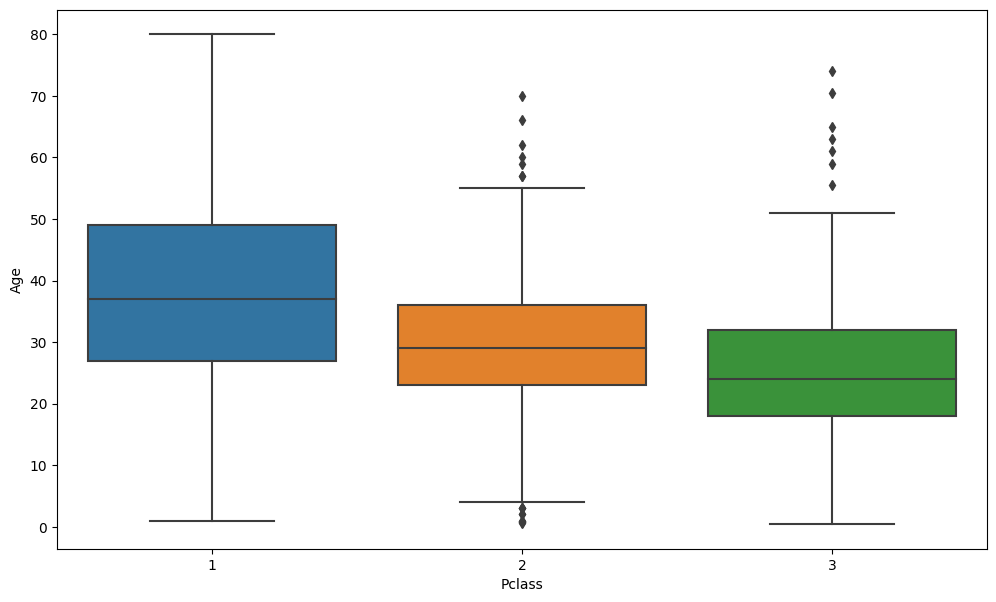

In [17]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train)

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. 

We'll use these average age values to impute based on Pclass for Age.

**If passenger from Class 1**, Missing Age is replaced by a value of **37**.

**If passenger from Class 2**, Missing Age is replaced by a value of **29**.

**If passenger from Class 3**, Missing Age is replaced by a value of **24**.

In [18]:
# First we select passengers belonging to first class.
train.loc[(train['Pclass'] == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [19]:
# We then select the passenger from first class and also having a missing age. 
train.loc[(train['Pclass'] == 1) & (train['Age'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C


In [20]:
# We just select the age column to replace the NaN values with specified values.
train.loc[(train['Pclass'] == 1) & (train['Age'].isnull()), "Age"]

31    NaN
55    NaN
64    NaN
166   NaN
168   NaN
185   NaN
256   NaN
270   NaN
284   NaN
295   NaN
298   NaN
306   NaN
334   NaN
351   NaN
375   NaN
457   NaN
475   NaN
507   NaN
527   NaN
557   NaN
602   NaN
633   NaN
669   NaN
711   NaN
740   NaN
766   NaN
793   NaN
815   NaN
839   NaN
849   NaN
Name: Age, dtype: float64

In [21]:
train.loc[(train['Pclass'] == 1) & (train['Age'].isnull()), "Age"] = 37
train.loc[(train['Pclass'] == 2) & (train['Age'].isnull()), "Age"] = 29
train.loc[(train['Pclass'] == 3) & (train['Age'].isnull()), "Age"] = 24

Now let's check that missing values plot again!

In [22]:
percent_nan = percent_missing(train)

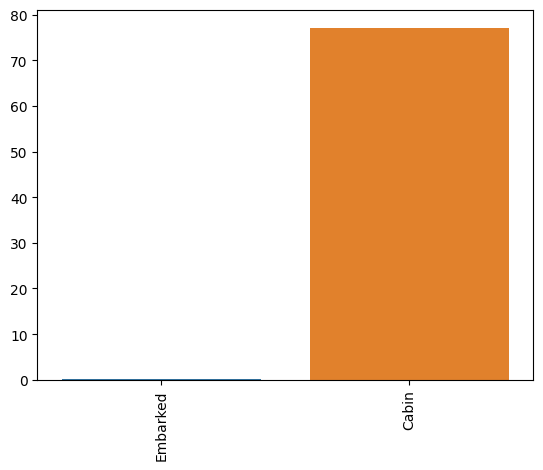

In [23]:
# Lets plot the data, use index as x-axis, and percentage of missing value for the y-axis.
# rotate to 90° the x-axis values (column names) for better visibility.
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [24]:
train.drop('Cabin',axis=1,inplace=True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
# Drop rows with null values (1 row remaining).
train.dropna(inplace=True)

In [27]:
percent_nan = percent_missing(train) # Check for missing data.

In [28]:
percent_nan # No more missing data.

Series([], dtype: float64)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [30]:
train['Sex'] # Convert string to numbers using dummy variables. 

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 889, dtype: object

In [31]:
# embarked Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton.
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [32]:
train['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 889, dtype: object

In [33]:
# one column is perfect predictor. if its 0 in female, i know its 1 for male.
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [34]:
train['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object

In [35]:
pd.get_dummies(train['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [36]:
# use drop_first=True to drop a column.
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
# Maybe consider Parch since it has 3 unique values ? This is for you to test and see if it gives better results

In [37]:
# remove unnecessary columns
train.drop(['Sex','Embarked','Name','Ticket', 'PassengerId'],axis=1,inplace=True) # Drop columns we wont be using.

In [38]:
# concatinate new dummy columns
train = pd.concat([train,sex,embark],axis=1) # concatinate columns together.

In [39]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<AxesSubplot:>

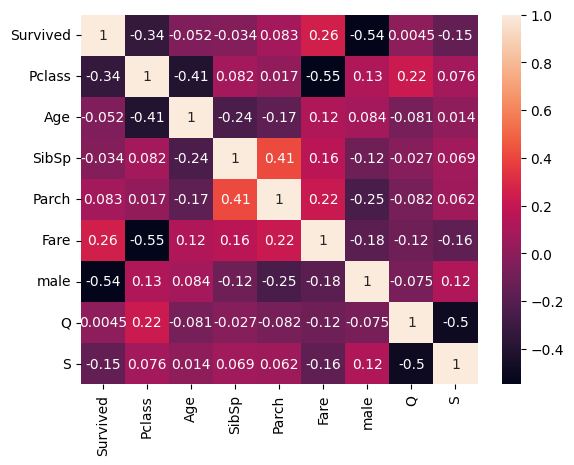

In [40]:
# Explore Correlation with full numerical columns
sns.heatmap(train.corr(), annot=True)

Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [43]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,24.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [45]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [45]:
print(f"training: {len(X_train)}, testing: {len(X_test)}")

training: 622, testing: 267


## Training and Predicting

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logmodel = LogisticRegression()

In [91]:
logmodel.fit(X_train,y_train)

LogisticRegression()

### Coeffecients

**Report back the model's coefficients.**

In [67]:
logmodel.coef_

array([[-1.20539107e+00, -4.56890516e-02, -2.55799158e-01,
        -2.17119205e-02,  1.34710702e-03, -2.45175625e+00,
         1.15862473e-01, -1.70722962e-01]])

In [69]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,24.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


### Coefficient Interpretation

Things to remember:

* These coeffecients relate to the **odds** and can not be directly interpreted as in linear regression.

**The estimated coefficients are the log odds. By exponentiating these values, we can calculate the odds, which are easier to interpret. Use np.exp()**

In [73]:
np.exp(logmodel.coef_)

array([[0.29957482, 0.95533898, 0.77429746, 0.97852209, 1.00134801,
        0.08614217, 1.12284144, 0.8430551 ]])

### Coefficient Interpretation (Pclass and Age)

This means:

* The odds for both Pclass and Age are **positive**, meaning that they are **positively associated** with surviving (**class 1**). 

* Let's focus on Pclass. We can interpret this as follows. For a 1 unit increase in Pclass we expect the odds of surviving to increase by 0.3 times (29\%).

* On the other hand, as Age increases by 1 unit, the odds of surviving are increased by 0.9 times (90%).

* For odds less than 1 (negative coefficients), we can take 1/odds to make even better sense of them. So as Age increases by 1, the odds of **not** surviving are 1/0.90 or 110%. What if Age was -0.15 ? what are the odds ? 

Let's move on to evaluate our model!

---------

## Model Performance Evaluation

**Let's now evaluate your model on the remaining 10% of the data, the test set.**

**Create the following evaluations:**

* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [74]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [75]:
predictions = logmodel.predict(X_test)

In [76]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "confusion_matrix.jpg")

In [77]:
confusion_matrix(y_test,predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)

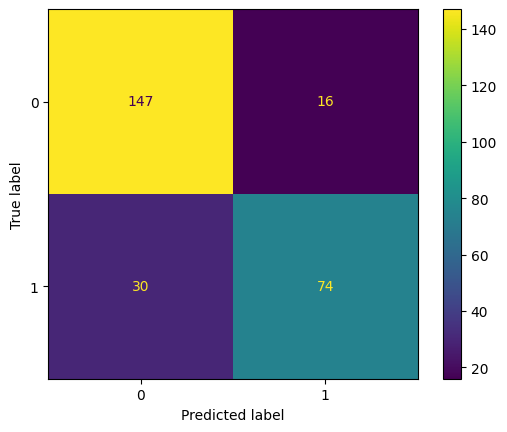

In [80]:
# Helps us plot the confusion matrix of a specific model. 
plot_confusion_matrix(logmodel,X_test,y_test)

In [81]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



This reports precision, recall and F1-score per class (0 and 1).

Recall: When it actually is a Positive case, how often is it correct ?

Precision: When the Prediction is Positive, how often is it correct ?

F1-score : harmonic means of Precision and Recall.

**If Precision and Recall have a close value to your accuracy, you don't have a problem of imbalanced dataset.**

Support: How many rows you have in this class.

**The above matrix calculates scores per class and gives an average of differences. If we want precision or recall scores using the formulas we seen in theory :**

In [82]:
from sklearn.metrics import precision_score, recall_score

In [83]:
precision_score(y_test, predictions)

0.8222222222222222

In [84]:
recall_score(y_test, predictions)

0.7115384615384616

### Performance Curves

**Create both the precision recall curve and the ROC Curve.**

In [85]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

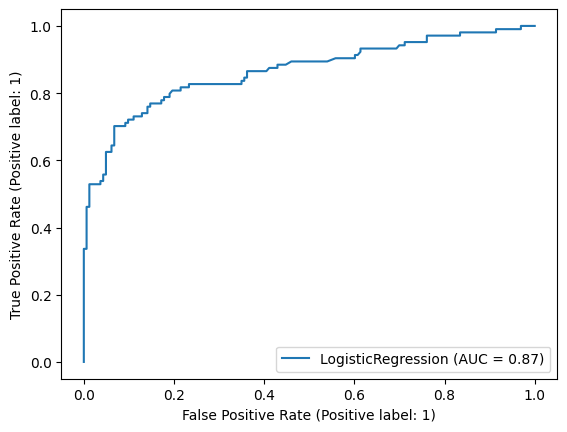

In [86]:
# Creates an ROC curve plot
plot_roc_curve(logmodel,X_test,y_test)

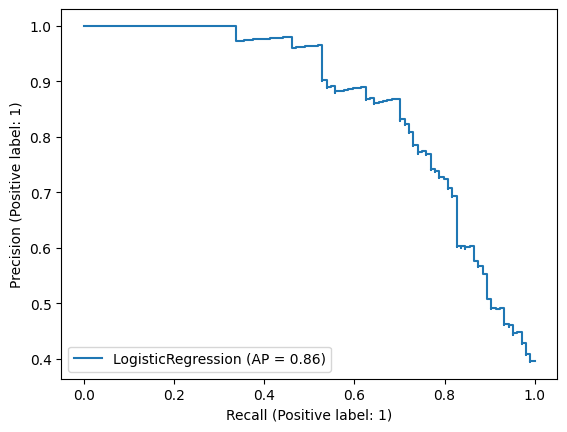

In [87]:
# Measure trade off between precision recall using precision recall curve
plot_precision_recall_curve(logmodel,X_test,y_test)

**Final Task: Leonardo Dicaprio wants to board the titanic, with the following features can we predict if he will make it or not ?**

    Pclass       1
    Age          48
    SibSp        0
    Parch        0
    Fare         120
    male         1
    Q            0
    S            0

**What does your model predict for Leo? Do they have make it ? How "sure" is your model of this prediction?**

*For convience, we created an array of the features for the case above*

In [88]:
leo = [[1, 48, 0, 0, 120, 1, 0, 0]]

In [89]:
logmodel.predict(leo)

array([0], dtype=int64)

In [90]:
logmodel.predict_proba(leo)

array([[0.61323219, 0.38676781]])

Not so bad! You might want to explore other feature engineering advanced steps.

Some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?

## Great Job!